In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import dataset from file directory
WV2015F = pd.read_excel("WV2015F.xlsx")

In [3]:
WV2015F.shape

(5132, 185)

In [4]:
WV2015F.head()

,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
0,5019,356,1.0,2.0,3.0,1.0,3.0,1.0,1.0,1.0,...,2.0,2.0,1.0,2.0,4.0,2,1982,32,6.0,2.0
1,5142,356,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,1.0,5.0,3.0,4.0,7.0,2,1965,49,4.0,1.0
2,3930,356,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,8.0,1.0,3.0,2.0,1,1954,60,6.0,1.0
3,3943,356,1.0,2.0,1.0,3.0,1.0,2.0,2.0,3.0,...,1.0,7.0,2.0,2.0,10.0,1,1988,26,4.0,1.0
4,3950,356,1.0,2.0,1.0,3.0,1.0,2.0,2.0,3.0,...,1.0,7.0,2.0,2.0,10.0,1,1985,29,4.0,2.0


In [5]:
# Create another object holding the data and print the names of the file's variables (columns)
dataf1 = WV2015F[:]
dataf1.iloc[160:163,:]

,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
160,5129,356,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1950,64,3.0,2.0
161,5132,356,NaN,2.0,3.0,3.0,2.0,2.0,2.0,3.0,...,1.0,4.0,1.0,3.0,1.0,1,1982,32,1.0,2.0
162,5133,356,1.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1989,25,3.0,2.0


In [6]:
dataf1.shape

(5132, 185)

In [7]:
dataf1.columns

Index(['Num', 'Country', 'Imp-Family', 'Imp-Friends', 'Imp-Leisure',
       'Imp-Politics', 'Imp-Work', 'Imp-Religion', 'Happy', 'Healthy',
       ...
       'Vote-national', 'Employed', 'Savings', 'SocialClass', 'Income', 'Sex',
       'BirthYear', 'Age', 'Educ', 'LiveWithParents'],
      dtype='object', length=185)

In [12]:
# Check for null values
dataf1.isnull().sum().sum()
# np.isnan(dataf1).sum().sum()

6818

In [13]:
# Handling missing data
# we can keep only complete records...
dataf2 = dataf1.dropna(how='any')  #drops any row with a NaN; with axis=1, drops columns; how "any" or "all"
dataf2.iloc[356:359,:]

,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
672,4892,356,4.0,2.0,4.0,4.0,1.0,4.0,4.0,4.0,...,2.0,7.0,4.0,1.0,9.0,2,1973,41,5.0,2.0
691,5244,356,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,7.0,3.0,2.0,2.0,2,1995,19,7.0,1.0
692,5246,356,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,...,2.0,7.0,3.0,2.0,2.0,1,1991,23,7.0,1.0


In [14]:
dataf2.shape

(2497, 185)

In [15]:
dataf1.median().head()

Num            4798.5
Country         356.0
Imp-Family        1.0
Imp-Friends       2.0
Imp-Leisure       2.0
dtype: float64

In [16]:
# or we can replace missing values (mean, median, )
# dataf3 = dataf1.fillna(dataf1.median())
dataf3 = dataf1.copy(deep = True)
dataf3.fillna(dataf3.median(), inplace=True)

dataf3.iloc[160:163,:]


,Num,Country,Imp-Family,Imp-Friends,Imp-Leisure,Imp-Politics,Imp-Work,Imp-Religion,Happy,Healthy,...,Vote-national,Employed,Savings,SocialClass,Income,Sex,BirthYear,Age,Educ,LiveWithParents
160,5129,356,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1950,64,3.0,2.0
161,5132,356,1.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,...,1.0,4.0,1.0,3.0,1.0,1,1982,32,1.0,2.0
162,5133,356,1.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,4.0,6.0,1,1989,25,3.0,2.0


In [17]:
dataf3.shape

(5132, 185)

In [21]:
#Create dataset including the variables for the analysis

dataf4 = dataf3.iloc[:, np.r_[2:20,22:32,45,60:68,136:168,178,180,182]]
y=dataf1.iloc[:,21]
#y=dataf3.iloc[:,21]


In [22]:
print(len(y))
print(y.name)
print(dataf4.shape)
print(dataf4.columns)


5132
Life Sat
(5132, 72)
Index(['Imp-Family', 'Imp-Friends', 'Imp-Leisure', 'Imp-Politics', 'Imp-Work',
       'Imp-Religion', 'Happy', 'Healthy', 'Child-Independent',
       'Child-HardWork', 'Child-Responsible', 'Child-Imagination',
       'Child-Respect', 'Child-Thrift', 'Child-Persevere', 'Child-Religious',
       'Child-Unselfish', 'Child-Obey', 'Trust Others24', 'Active-Church',
       'Active-Sports', 'Active-Arts', 'Active-Union', 'Active-Politics',
       'Active-Environment', 'Active-Profession', 'Active-Charity',
       'Active-Consumer Org', 'LOC', 'SchCreate', 'SchRich', 'SchSecure',
       'SchFun', 'SchSuccess', 'SchExciting', 'SchBehave', 'SchEnviron',
       'Locale-Secure', 'Locale-Robberies', 'Locale-Alcohol', 'Locale-NoCash',
       'Locale-NoNightOut', 'Locale-Gun', 'Locale-CrimeVictimSelf',
       'Locale-CrimeVictimFamily', 'Worry-LoseJob', 'Worry-ChildEduc',
       'Worry-War', 'War4Justice', 'Worry-NoFood', 'Worry-Crime',
       'Worry-MedicalCare', 'Worry-Mone

In [56]:
# y is a Series into a numeric value and replace NA by median
y.describe()

y.value_counts() 

y1 = y.fillna(y.median())
y1.isnull().sum()

y1.describe()

y1.value_counts()


8.0     1209
7.0      836
9.0      604
6.0      492
5.0      448
10.0     349
2.0      322
1.0      322
3.0      277
4.0      273
Name: Life Sat, dtype: int64

In [57]:
#Select random index for selecting training and testing datasets
import random

#random.seed(2)
indices = list(range(len(dataf4)))
#random.shuffle(indices)
indices[0:10]
train_rows = random.sample(indices,int(len(dataf4)*.66))
print(len(train_rows))
type(train_rows)#[0:10]

3387


list

In [58]:
train_rows[:10]

[3384, 1816, 4939, 4123, 3337, 1493, 4176, 42, 2590, 247]

In [62]:
#Split data into train (2/3) and test (1/3) sets
x_train = dataf4.iloc[train_rows,:]
x_test = dataf4.iloc[list(np.isin(dataf4.index, train_rows, invert=True)),:].shape
y_train = y1.iloc[train_rows]
y_test = y1.iloc[list(np.isin(dataf4.index, train_rows, invert=True))]

In [71]:
#Another way to split data
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(dataf3, y1, test_size=0.33, random_state=42)

In [94]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        dataf1[feature],
        dataf1[target],
        c='black'
    )
    plt.xlabel("IV: {} ".format(feature))
    plt.ylabel("DV: Satisfaction")
    plt.show()

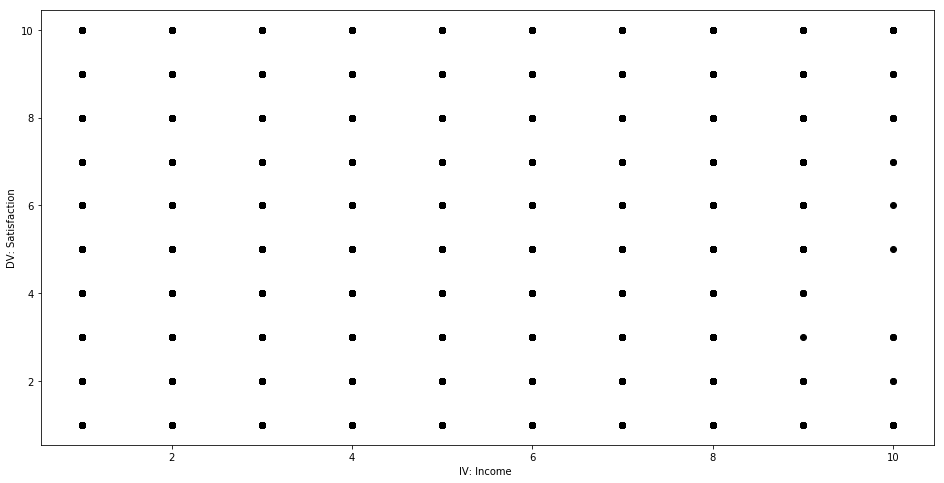

In [97]:
scatter_plot('Income','Life Sat')

In [100]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV


In [129]:
# Ridge
# Optimizes  RSS (Residual Sum of Squares) + α * (sum of square of coefficients)
# Where α (alpha) defines the balance between both.


regr = linear_model.Ridge(alpha=.00001)
regr.fit(X_train, y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
regr.coef_

array([ 1.25188343e-09,  2.96821125e-08,  1.47523185e-06,  1.89474200e-06,
       -2.78119095e-06,  1.50739298e-06, -2.34581875e-06, -1.63307717e-06,
       -1.88047513e-05, -5.71801952e-06, -5.39437198e-06, -3.36704210e-06,
       -5.19970249e-06, -2.39797403e-06,  5.04154973e-06, -3.77027564e-06,
        3.93312239e-07, -2.03848392e-06, -2.22002303e-06, -7.51573389e-06,
        5.01852750e-06,  9.99950514e-01, -8.72096720e-06,  2.23135993e-06,
       -2.20926304e-06,  2.32943034e-06, -5.11086667e-07,  2.86286303e-06,
       -5.58724884e-07, -5.49651170e-06,  2.60285157e-06, -7.85745679e-06,
        2.02593177e-06, -2.37037130e-06,  3.69076440e-06,  6.06603034e-07,
       -1.16256886e-06,  4.95591992e-06,  2.55196693e-07, -2.40465061e-08,
       -6.21213645e-07, -4.90503678e-06,  8.31018189e-06, -2.39624124e-07,
        1.44386956e-06,  1.00614798e-05,  3.19666770e-06, -5.73304493e-07,
        4.52405362e-08,  1.02551123e-05,  2.21529408e-06, -3.16912954e-06,
       -2.03071205e-07,  

In [112]:
regr.intercept_

0.0011181014567744896

In [130]:
# Optimizes  RSS (Residual Sum of Squares) + α * (sum of square of coefficients)
# Where α (alpha) defines the balance between both.
# How to find α

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
#alpha = np.logspace(-6, 6, 13)

regr = linear_model.RidgeCV(alphas=alpha)
regr.fit(X_train, y_train)


RidgeCV(alphas=array([1.e-15, 1.e-10, 1.e-08, 1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00,
       1.e+01, 2.e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [131]:
regr.alpha_

1e-15

In [ ]:
# Lasso


In [132]:
regl = linear_model.Lasso(alpha=0.1)
regl.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [134]:
regl.predict(X_test)

array([6.99903582, 5.02766954, 7.97969446, ..., 7.97702829, 7.97303371,
       7.98358899])

In [135]:
# Elastic Net

rege = linear_model.ElasticNet(alpha=0.1)
rege.fit = (X_train, y_train)

In [ ]:





Fit models: The glmnet command loads an input matrix, x.train, and a response vector, y.train
Setting alpha=0 ensures ridge
Setting alpha=1 ensures lasso
Setting alpha>0 & <1 ensures elastic net
family = gaussian refers to DV being normally distributes so linear regression is the appropriate model
nlambda refers to the number of lambda's to be tried
```{r}
fit.ridge = glmnet(x.train, y.train, family="gaussian", nlambda = 150, alpha=0)
fit.lasso = glmnet(x.train, y.train, family="gaussian", nlambda = 150, alpha=1)
fit.elnet = glmnet(x.train, y.train, family="gaussian", nlambda = 150, alpha=.5)
```


Explore RIDGE REGRESSION
Store regression coefficients for each predictor for each of the 150 lambdas in an object
```{r}
myCoefs = coef(fit.ridge)
dim(myCoefs)
```
lambda = the actual lambda's randomly chosen 
Some results of regression coefficients for each lambda (columns) starting with the largest lambda
```{r}
fit.ridge$lambda[c(1:5)]
myCoefs[1:15,1:5] 
```


Plot the fit of the ridge regression models.  Each curve is a variable, so there are 76 curves.  The Y-axis represents the size of the regression coefficients, the X-axis is the log of the 150 lambdas.  Exponentiate the x-axis values and you'll obtain the actual lambda value.  The top of the graph lists the number of non-zero coefficients for the lambda at that location on the X-axis.  Note how the regression coefficients converge on 0.0 as lambda increases.
```{r}
plot(fit.ridge, xvar="lambda")
```

Obtain a summary of the Ridge Regression results using the print function.  
Df = the number on non-zero coefficients.
%Dev = the percent (of null) deviance explained.
lambda = ? 
Print will list the above information for all the lambdas specified by the model (150 in this model).  If the %Dev does not decrease enough for consecutive lambdas, printing stops.

```{r}
print(fit.ridge)
```


Perform cross validation using the training data to find the best lambda, the one with the smallest MSE (mean square error).
Plot the cross-validation results.
cv.glmnet outputs an object (cv.fit.ridge) which is a list of the elements of the cross-validation fit.  glmnet performs a k-fold cross-validation where the default is k=10.
```{r}
cv.fit.ridge = cv.glmnet(x.train, y.train)
plot(cv.fit.ridge)
```


Examine the graph of the results of the Ridge Regression cross-validation.  glmnet performs a 10-fold cross-validation for each lambda.  In this case there were 150 lambdas specified, so there were 150 cross-validations.  The average MSE for each of the 150 cross-validations and the SD of the MSEs for each cross validation are plotted in the graph.  The vertical lines in the center of the graph are the lambda with the minimum mean MSE (lambda.min) and the lambda which gives the most regularized model such that error is within one standard error of the minimum (lambda.1se).


Examine the minimum and 1SE lambdas.  The values that are printed below are the lambdas that correspond to the log(lambda) on the X-axis of the graph.
```{r}
cv.fit.ridge$lambda.min
cv.fit.ridge$lambda.1se
```

Print the coefficients for the optimal lambda (lambda.min or lambda.1se)
```{r}
coef(cv.fit.ridge, s = "lambda.min")
```


Use the test data to try out the cross-validated model
```{r}
pred.ridge=predict(cv.fit.ridge, newx=x.test, s="lambda.min")
```


Obtain the correlation between the predicted and actual scores.
```{r}
cor(pred.ridge,y.test)
```


Obtain the MSE between the predicted and actual scores.
```{r}
mse.ridge = mean((y.test - pred.ridge)^2)
mse.ridge
```



RIDGE, LASSO, & ELASTIC NET REGRESSION

Perform cross validation and accumulate results into objects fit0 to fit10 
where each object contains the results from a different setting for alpha 
alpha = 0,.1,.2,...1.0.  For Ridge, alpha = 0, for Lasso, alpha = 1, and for elasticnet, alpha=.5
```{r}
for (i in 0:10) {
assign(paste("fit", i, sep=""),
cv.glmnet(x.train, y.train, type.measure="mse", alpha=i/10, family="gaussian"))
}
```


Plot the results
```{r}
par(mfrow=c(3,2))
plot(fit.lasso, xvar="lambda", main="LASSO", cex.main=.5)
plot(fit10, main="LASSO", cex.main=.5)
plot(fit.ridge, xvar="lambda", main="Ridge", cex.main=.5)
plot(fit0, main="Ridge", cex.main=.5)
plot(fit.elnet, xvar="lambda", main="Elastic Net", cex.main=.75)
plot(fit5, main="Elastic Net", cex.main=.5)
```


Obtain the predicted values using the test data for each fit
```{r}
yhat0 = predict(fit0, s=fit0$lambda.1se, newx=x.test)
yhat1 = predict(fit1, s=fit1$lambda.1se, newx=x.test)
yhat2 = predict(fit2, s=fit2$lambda.1se, newx=x.test)
yhat3 = predict(fit3, s=fit3$lambda.1se, newx=x.test)
yhat4 = predict(fit4, s=fit4$lambda.1se, newx=x.test)
yhat5 = predict(fit5, s=fit5$lambda.1se, newx=x.test)
yhat6 = predict(fit6, s=fit6$lambda.1se, newx=x.test)
yhat7 = predict(fit7, s=fit7$lambda.1se, newx=x.test)
yhat8 = predict(fit8, s=fit8$lambda.1se, newx=x.test)
yhat9 = predict(fit9, s=fit9$lambda.1se, newx=x.test)
yhat10 = predict(fit10, s=fit10$lambda.1se, newx=x.test)
```


Calculate MSE using the test data for each fit
```{r}
mse0 = mean((y.test - yhat0)^2)
mse1 = mean((y.test - yhat1)^2)
mse2 = mean((y.test - yhat2)^2)
mse3 = mean((y.test - yhat3)^2)
mse4 = mean((y.test - yhat4)^2)
mse5 = mean((y.test - yhat5)^2)
mse6 = mean((y.test - yhat6)^2)
mse7 = mean((y.test - yhat7)^2)
mse8 = mean((y.test - yhat8)^2)
mse9 = mean((y.test - yhat9)^2)
mse10 = mean((y.test - yhat10)^2)
```



Print MSE for each fit to see which model has the lowest MSE and is the winner.
```{r}
mse0  ##Ridge 0
mse1  ##Enet .1
mse2  ##Enet .2
mse3  ##Enet .3
mse4  ##Enet .4
mse5  ##Enet .5
mse6  ##Enet .6
mse7  ##Enet .7
mse8  ##Enet .8
mse9  ##Enet .9
mse10 ##LASSO 1
```


Which model has the best correlation between the predicted and actual Y variable in the test data?
```{r}
cor(yhat0,y.test) ##Ridge
cor(yhat1,y.test) ##Enet .1
cor(yhat2,y.test) ##Enet .2
cor(yhat3,y.test) ##Enet .3
cor(yhat4,y.test) ##Enet .4
cor(yhat5,y.test) ##Enet .5
cor(yhat6,y.test) ##Enet .6
cor(yhat7,y.test) ##Enet .7
cor(yhat8,y.test) ##Enet .8
cor(yhat9,y.test) ##Enet .9
cor(yhat10,y.test) ##LASSO

In [ ]:
\